In [3]:
import pandas as pd

In [ ]:
import numpy as np

In [1]:
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns

<frozen importlib._bootstrap>:488: RuntimeWarning: The global interpreter lock (GIL) has been enabled to load module 'pandas._libs.pandas_parser', which has not declared that it can run safely without the GIL. To override this behavior and keep the GIL disabled (at your own risk), run with PYTHON_GIL=0 or -Xgil=0.


In [9]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)

   -------------------- ------------------- 1/2 [openpyxl]
   -------------------- ------------------- 1/2 [openpyxl]
   ---------------------------------------- 2/2 [openpyxl]



In [16]:
df = pd.read_csv('GELDIUM_DELIQUENCY_DATASET.csv')

In [17]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,...,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,_Credit_Utilization_raw,_Debt_to_Income_Ratio_raw
0,CUST0001,56,165580.0,398.0,0.390502,3,0.0,16310.0,0.317396,EMP,...,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late,0.390502,0.317396
1,CUST0002,69,100999.0,493.0,0.312444,6,1.0,17401.0,0.196093,Self-employed,...,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time,0.312444,0.196093
2,CUST0003,46,188416.0,500.0,0.359930,0,0.0,13761.0,0.301655,Self-employed,...,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late,0.359930,0.301655
3,CUST0004,32,101672.0,413.0,0.371400,3,0.0,88778.0,0.264794,Unemployed,...,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late,0.371400,0.264794
4,CUST0005,60,38524.0,487.0,0.234716,2,0.0,13316.0,0.510583,Self-employed,...,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late,0.234716,0.510583


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_ID                500 non-null    object 
 1   Age                        500 non-null    int64  
 2   Income                     500 non-null    float64
 3   Credit_Score               500 non-null    float64
 4   Credit_Utilization         500 non-null    float64
 5   Missed_Payments            500 non-null    int64  
 6   Delinquent_Account         500 non-null    float64
 7   Loan_Balance               494 non-null    float64
 8   Debt_to_Income_Ratio       442 non-null    float64
 9   Employment_Status          500 non-null    object 
 10  Account_Tenure             436 non-null    float64
 11  Credit_Card_Type           500 non-null    object 
 12  Location                   500 non-null    object 
 13  Month_1                    500 non-null    object 

In [19]:
df.columns

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', '_Credit_Utilization_raw',
       '_Debt_to_Income_Ratio_raw'],
      dtype='object')

In [22]:
df.isnull().sum()

Customer_ID                   0
Age                           0
Income                        0
Credit_Score                  0
Credit_Utilization            0
Missed_Payments               0
Delinquent_Account            0
Loan_Balance                  6
Debt_to_Income_Ratio         58
Employment_Status             0
Account_Tenure               64
Credit_Card_Type              0
Location                      0
Month_1                       0
Month_2                       0
Month_3                       0
Month_4                       0
Month_5                       6
Month_6                      64
_Credit_Utilization_raw       0
_Debt_to_Income_Ratio_raw    58
dtype: int64

In [23]:
# List of columns to remove
cols_to_remove = ['_Credit_Utilization_raw', '_Debt_to_Income_Ratio_raw']

# Drop the columns
df = df.drop(columns=cols_to_remove)

# Verify they are gone
print(df.columns)

Index(['Customer_ID', 'Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Employment_Status', 'Account_Tenure',
       'Credit_Card_Type', 'Location', 'Month_1', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6'],
      dtype='object')


In [24]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0.0,16310.0,0.317396,EMP,18.0,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1.0,17401.0,0.196093,Self-employed,0.0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0.0,13761.0,0.301655,Self-employed,1.0,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0.0,88778.0,0.264794,Unemployed,15.0,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0.0,13316.0,0.510583,Self-employed,11.0,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [25]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [26]:
df.shape

(500, 19)

In [27]:
df.isnull().sum()

Customer_ID              0
Age                      0
Income                   0
Credit_Score             0
Credit_Utilization       0
Missed_Payments          0
Delinquent_Account       0
Loan_Balance             6
Debt_to_Income_Ratio    58
Employment_Status        0
Account_Tenure          64
Credit_Card_Type         0
Location                 0
Month_1                  0
Month_2                  0
Month_3                  0
Month_4                  0
Month_5                  6
Month_6                 64
dtype: int64

In [28]:
df.head()

,Customer_ID,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Employment_Status,Account_Tenure,Credit_Card_Type,Location,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6
0,CUST0001,56,165580.0,398.0,0.390502,3,0.0,16310.0,0.317396,EMP,18.0,Student,Los Angeles,Late,Late,Missed,Late,Missed,Late
1,CUST0002,69,100999.0,493.0,0.312444,6,1.0,17401.0,0.196093,Self-employed,0.0,Standard,Phoenix,Missed,Missed,Late,Missed,On-time,On-time
2,CUST0003,46,188416.0,500.0,0.359930,0,0.0,13761.0,0.301655,Self-employed,1.0,Platinum,Chicago,Missed,Late,Late,On-time,Missed,Late
3,CUST0004,32,101672.0,413.0,0.371400,3,0.0,88778.0,0.264794,Unemployed,15.0,Platinum,Phoenix,Late,Missed,Late,Missed,Late,Late
4,CUST0005,60,38524.0,487.0,0.234716,2,0.0,13316.0,0.510583,Self-employed,11.0,Standard,Phoenix,Missed,On-time,Missed,Late,Late,Late


In [29]:
# Convert categorical columns into dummy/indicator variables
df = pd.get_dummies(df, columns=['Employment_Status', 'Credit_Card_Type', 'Location'], drop_first=True)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = ['Age', 'Income', 'Credit_Score', 'Credit_Utilization', 'Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']

df[num_cols] = scaler.fit_transform(df[num_cols])

In [32]:
# List of the month columns
month_cols = ['Month_1', 'Month_2', 'Month_3', 'Month_4', 'Month_5', 'Month_6']

# Convert all month columns to numeric, turning non-numeric text into NaN
for col in month_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Fill NaN values with 0 (assuming non-numeric or missing means no delinquency)
df[month_cols] = df[month_cols].fillna(0)

# Now try the mean calculation again
df['Avg_Status_6m'] = df[month_cols].mean(axis=1)

# And the recent miss calculation
df['Recent_Miss'] = (df['Month_6'] > 0).astype(int)

print("Features created successfully!")

Features created successfully!


In [33]:
df = df.drop(columns=['Customer_ID'])

In [35]:
print(df.columns)

Index(['Age', 'Income', 'Credit_Score', 'Credit_Utilization',
       'Missed_Payments', 'Delinquent_Account', 'Loan_Balance',
       'Debt_to_Income_Ratio', 'Account_Tenure', 'Month_1', 'Month_2',
       'Month_3', 'Month_4', 'Month_5', 'Month_6', 'Employment_Status_1',
       'Employment_Status_10', 'Employment_Status_11', 'Employment_Status_12',
       'Employment_Status_13', 'Employment_Status_14', 'Employment_Status_15',
       'Employment_Status_16', 'Employment_Status_17', 'Employment_Status_18',
       'Employment_Status_19', 'Employment_Status_2', 'Employment_Status_3',
       'Employment_Status_4', 'Employment_Status_5', 'Employment_Status_6',
       'Employment_Status_7', 'Employment_Status_8', 'Employment_Status_9',
       'Employment_Status_Business', 'Employment_Status_EMP',
       'Employment_Status_Employed', 'Employment_Status_Gold',
       'Employment_Status_Platinum', 'Employment_Status_Self-employed',
       'Employment_Status_Student', 'Employment_Status_Unemployed'

In [36]:
# 1. Clean column names (removes leading/trailing spaces)
df.columns = df.columns.str.strip()

# 2. List the columns we want to encode
target_cols = ['Employment_Status', 'Credit_Card_Type', 'Location']

# 3. Only attempt to encode columns that are actually present
available_cols = [c for c in target_cols if c in df.columns]

if available_cols:
    df = pd.get_dummies(df, columns=available_cols, drop_first=True)
    print(f"Successfully encoded: {available_cols}")
else:
    print("Columns not found. They might already be encoded or names are different.")

# 4. View result
df.head()

Columns not found. They might already be encoded or names are different.


,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Month_1,...,Credit_Card_Type_Student,Location_Houston,Location_Late,Location_Los Angeles,Location_Missed,Location_New York,Location_On-time,Location_Phoenix,Avg_Status_6m,Recent_Miss
0,0.601926,1.111365,-0.587844,-0.341158,3,0.0,-0.836072,-0.093490,1.378938,0.0,...,True,False,False,True,False,False,False,False,0.0,0
1,1.405812,0.017404,-0.165183,-0.427016,6,1.0,-0.801841,-0.192146,-1.612191,0.0,...,False,False,False,False,False,False,False,True,0.0,0
2,-0.016449,1.498193,-0.134040,-0.374785,0,0.0,-0.916049,-0.106292,-1.446017,0.0,...,False,False,False,False,False,False,False,False,0.0,0
3,-0.882173,0.028804,-0.521108,-0.362169,3,0.0,1.437665,-0.136271,0.880416,0.0,...,False,False,False,False,False,False,False,True,0.0,0
4,0.849275,-1.040884,-0.191877,-0.512511,2,0.0,-0.930011,0.063628,0.215721,0.0,...,False,False,False,False,False,False,False,True,0.0,0


In [37]:
# Fill missing numerical values with the median
cols_with_nas = ['Loan_Balance', 'Debt_to_Income_Ratio', 'Account_Tenure']

for col in cols_with_nas:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].median())

print("Missing values filled!")

Missing values filled!


In [38]:
df.head(10)

,Age,Income,Credit_Score,Credit_Utilization,Missed_Payments,Delinquent_Account,Loan_Balance,Debt_to_Income_Ratio,Account_Tenure,Month_1,...,Credit_Card_Type_Student,Location_Houston,Location_Late,Location_Los Angeles,Location_Missed,Location_New York,Location_On-time,Location_Phoenix,Avg_Status_6m,Recent_Miss
0,0.601926,1.111365,-0.587844,-0.341158,3,0.0,-0.836072,-0.093490,1.378938,0.0,...,True,False,False,True,False,False,False,False,0.0,0
1,1.405812,0.017404,-0.165183,-0.427016,6,1.0,-0.801841,-0.192146,-1.612191,0.0,...,False,False,False,False,False,False,False,True,0.0,0
2,-0.016449,1.498193,-0.134040,-0.374785,0,0.0,-0.916049,-0.106292,-1.446017,0.0,...,False,False,False,False,False,False,False,False,0.0,0
3,-0.882173,0.028804,-0.521108,-0.362169,3,0.0,1.437665,-0.136271,0.880416,0.0,...,False,False,False,False,False,False,False,True,0.0,0
4,0.849275,-1.040884,-0.191877,-0.512511,2,0.0,-0.930011,0.063628,0.215721,0.0,...,False,False,False,False,False,False,False,True,0.0,0
5,-1.315035,-0.269837,0.755774,-0.055136,6,0.0,0.169552,-0.139611,-0.448974,0.0,...,False,False,False,False,False,True,False,False,0.0,0
6,-0.511148,-1.099630,-0.783603,-0.341071,3,0.0,-1.202289,0.042223,1.212764,0.0,...,False,False,False,False,False,True,False,False,0.0,0
7,0.601926,0.393729,-0.512210,-0.184735,5,0.0,0.402203,-0.059902,-1.446017,0.0,...,True,False,False,False,False,True,False,False,0.0,0
8,-0.634823,-0.558671,-0.556701,-0.316374,5,1.0,-1.347803,-0.101783,0.049547,0.0,...,False,False,False,False,False,False,True,False,0.0,0
9,-0.387473,-1.102780,0.662344,-0.372702,4,0.0,1.599062,-0.080734,-0.781322,0.0,...,False,False,False,True,False,False,False,False,0.0,0


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Define Target (y) and Features (X)
# We drop 'Delinquent_Account' because it's the answer, 
# and 'Customer_ID' because it's just a label.
y = df['Delinquent_Account']
X = df.drop(columns=['Delinquent_Account', 'Customer_ID'], errors='ignore')

# Split the data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Testing set size: {X_test.shape}")

Training set size: (400, 63)
Testing set size: (100, 63)


In [41]:
import numpy as np

# Convert the scaled target back into binary classes (0 and 1)
# If the value is > 0, it's a 1 (Delinquent), otherwise 0
y_binary = (y > 0).astype(int)

# Split the data again using the fixed target
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

# Initialize and Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

print("Model trained successfully!")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Model trained successfully!
Accuracy: 0.87


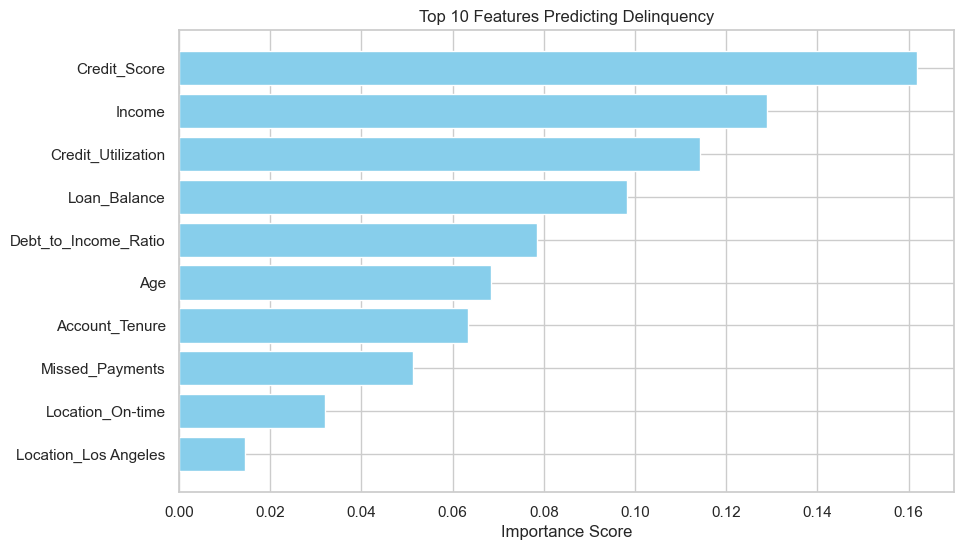

In [42]:
import matplotlib.pyplot as plt
import pandas as pd

# Get feature importances from the model
importances = model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'].head(10), feature_importance_df['Importance'].head(10), color='skyblue')
plt.xlabel('Importance Score')
plt.title('Top 10 Features Predicting Delinquency')
plt.gca().invert_yaxis()
plt.show()

<Figure size 800x600 with 0 Axes>

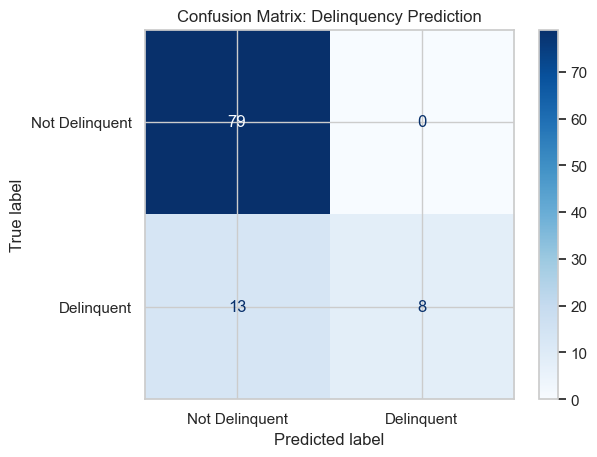

In [43]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display it visually
plt.figure(figsize=(8, 6))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Delinquent', 'Delinquent'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix: Delinquency Prediction')
plt.show()

In [44]:
import joblib

# Save the model to a file
joblib.dump(model, 'delinquency_model.pkl')

# If you used a scaler earlier, save that too!
# joblib.dump(scaler, 'scaler.pkl')

print("Model saved as delinquency_model.pkl")

Model saved as delinquency_model.pkl


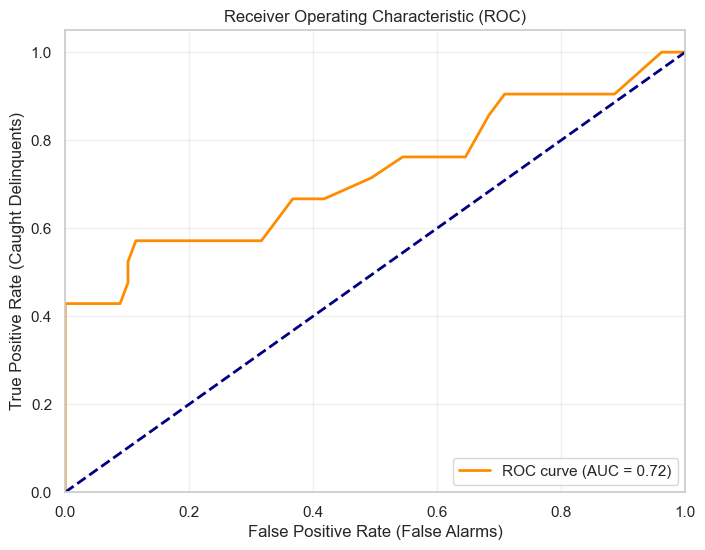

In [45]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Get the probabilities (not just 0 or 1)
# we take the second column which is the probability of being 'Delinquent'
y_probs = model.predict_proba(X_test)[:, 1]

# 2. Calculate ROC metrics
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

# 3. Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--') # The diagonal "luck" line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (False Alarms)')
plt.ylabel('True Positive Rate (Caught Delinquents)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)
plt.show()

In [46]:
import numpy as np

# 1. Get the True Positive Rate, False Positive Rate, and Thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# 2. Calculate J statistic: J = TPR – FPR
j_stat = tpr - fpr
optimal_idx = np.argmax(j_stat)
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold for your system: {optimal_threshold:.4f}")

Optimal Threshold for your system: 0.2600


In [47]:
def autonomous_debt_manager_v2(customer_data, model_path='delinquency_model.pkl'):
    model = joblib.load(model_path)
    
    # Get the probability of delinquency
    prob = model.predict_proba(customer_data)[0, 1]
    
    # Use your new Optimal Threshold
    threshold = 0.26
    
    if prob >= threshold:
        status = f"🔴 ALERT: Risk Level {prob:.2%}"
        action = "STRATEGY: High Priority. Send automated restructuring offer immediately."
    elif prob >= 0.15:
        status = f"🟡 WARNING: Risk Level {prob:.2%}"
        action = "STRATEGY: Medium Priority. Send automated payment reminder."
    else:
        status = f"🟢 SAFE: Risk Level {prob:.2%}"
        action = "STRATEGY: No action needed. Maintain standard monitoring."
        
    return status, action

In [48]:
import joblib

# Save the model to a file
joblib.dump(model, 'delinquency_model.pkl')

# If you used a scaler earlier, save that too!
# joblib.dump(scaler, 'scaler.pkl')

print("Model saved as delinquency_model.pkl")

Model saved as delinquency_model.pkl


In [49]:
X_train.columns.tolist()

['Age',
 'Income',
 'Credit_Score',
 'Credit_Utilization',
 'Missed_Payments',
 'Loan_Balance',
 'Debt_to_Income_Ratio',
 'Account_Tenure',
 'Month_1',
 'Month_2',
 'Month_3',
 'Month_4',
 'Month_5',
 'Month_6',
 'Employment_Status_1',
 'Employment_Status_10',
 'Employment_Status_11',
 'Employment_Status_12',
 'Employment_Status_13',
 'Employment_Status_14',
 'Employment_Status_15',
 'Employment_Status_16',
 'Employment_Status_17',
 'Employment_Status_18',
 'Employment_Status_19',
 'Employment_Status_2',
 'Employment_Status_3',
 'Employment_Status_4',
 'Employment_Status_5',
 'Employment_Status_6',
 'Employment_Status_7',
 'Employment_Status_8',
 'Employment_Status_9',
 'Employment_Status_Business',
 'Employment_Status_EMP',
 'Employment_Status_Employed',
 'Employment_Status_Gold',
 'Employment_Status_Platinum',
 'Employment_Status_Self-employed',
 'Employment_Status_Student',
 'Employment_Status_Unemployed',
 'Employment_Status_employed',
 'Employment_Status_retired',
 'Credit_Card_Ty